In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# BGR convention while matplotlib uses the RGB

In [3]:
image = cv2.imread('images/IMG_2211_960.JPG')

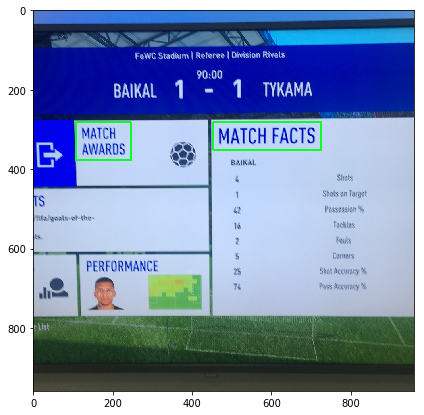

In [15]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

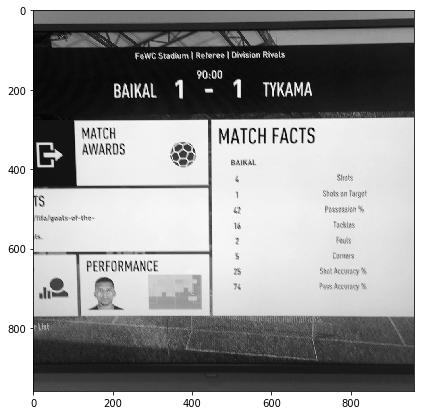

In [5]:
plt.figure(figsize=(7,7))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

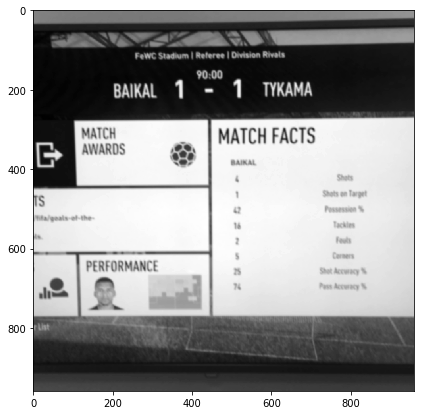

In [6]:
plt.figure(figsize=(7,7))
blur = cv2.GaussianBlur(gray, (9,9), 0)
plt.imshow(blur,cmap='gray')

In [36]:

thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=4)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 1000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)

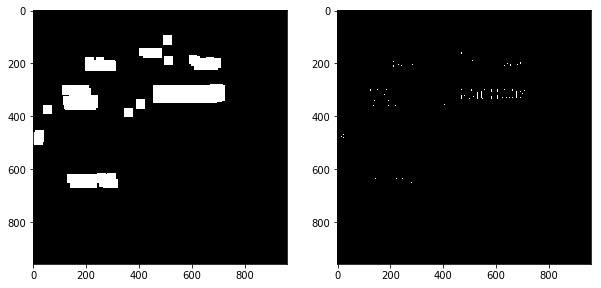

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow( dilate, cmap='gray')
plt.subplot(1,2,2)
plt.imshow( thresh, cmap='gray')

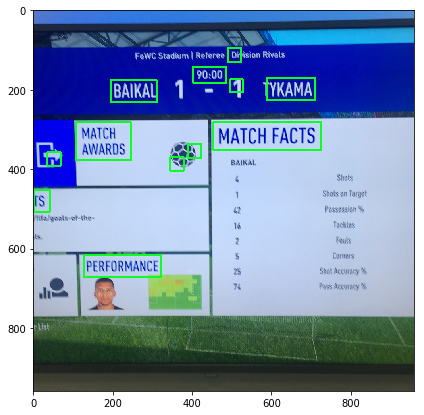

In [38]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))